# Initial Exploratory Data Analysis (EDA)

In this section, we will perform an initial exploratory data analysis (EDA) on the TMDB movie dataset. This includes loading the dataset, cleaning the data, and visualizing key features to understand the distribution and relationships within the data.

In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [256]:
df = pd.read_csv("./data/TMDB_movie_dataset_v11.csv")
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


## Cleaning and Extracting Relevant Features

In [257]:
df = df[['id', 'title', 'vote_average', 'vote_count', 'release_date', 'adult', 'overview', 'genres', 'keywords']]

In [260]:
df.isna().sum()

id              0
title           0
vote_average    0
vote_count      0
release_date    0
adult           0
overview        0
genres          0
keywords        0
dtype: int64

In [261]:
df = df.dropna()

In [262]:
df.head()

,id,title,vote_average,vote_count,release_date,adult,overview,genres,keywords
0,27205,Inception,8.364,34495,2010-07-15,False,"Cobb, a skilled thief who commits corporate es...","Action, Science Fiction, Adventure","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,2014-11-05,False,The adventures of a group of explorers who mak...,"Adventure, Drama, Science Fiction","rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,2008-07-16,False,Batman raises the stakes in his war on crime. ...,"Drama, Action, Crime, Thriller","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,2009-12-15,False,"In the 22nd century, a paraplegic Marine is di...","Action, Adventure, Fantasy, Science Fiction","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,2012-04-25,False,When an unexpected enemy emerges and threatens...,"Science Fiction, Action, Adventure","new york city, superhero, shield, based on com..."


## Visualizing rating distributions

c:\Users\Brendan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


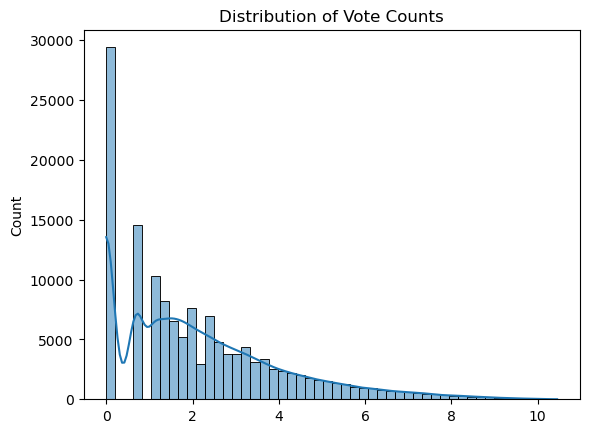

In [263]:
import seaborn as sns
import matplotlib.pyplot as plt
df = df[df['vote_count'] > 0]
log_vote_count = np.log(df['vote_count'])
sns.histplot(log_vote_count, bins=50, kde=True)
plt.title("Distribution of Vote Counts")
plt.xlabel("")
plt.show()

c:\Users\Brendan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


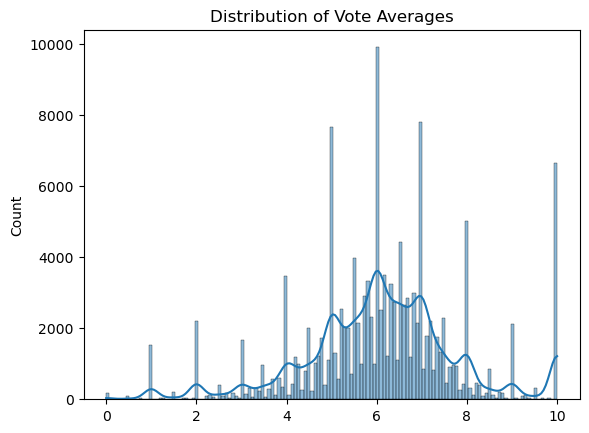

In [264]:
sns.histplot(df['vote_average'], kde=True)
plt.title("Distribution of Vote Averages")
plt.xlabel("")
plt.show()

In [265]:
df['vote_average'].describe()

count    140489.000000
mean          6.100898
std           1.719072
min           0.000000
25%           5.100000
50%           6.100000
75%           7.000000
max          10.000000
Name: vote_average, dtype: float64

In [266]:
df.to_csv('./data/movie_data_v1.csv')

In [276]:
df = pd.read_csv('./data/movie_data_v1.csv')
df = df.drop(columns=['Unnamed: 0', 'overview', 'adult'])


In [277]:
m = df['vote_count'].quantile(0.95)

In [278]:
m

424.6000000000058

In [279]:
df = df[df['vote_count'] >= m]
df

,id,title,vote_average,vote_count,release_date,genres,keywords
0,27205,Inception,8.364,34495,2010-07-15,"Action, Science Fiction, Adventure","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,2014-11-05,"Adventure, Drama, Science Fiction","rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,2008-07-16,"Drama, Action, Crime, Thriller","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,2009-12-15,"Action, Adventure, Fantasy, Science Fiction","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,2012-04-25,"Science Fiction, Action, Adventure","new york city, superhero, shield, based on com..."
...,...,...,...,...,...,...,...
7020,309299,Experimenter,6.554,425,2015-10-16,"Drama, History","experiment, psychology, controversy, biography..."
7021,51588,Prom,6.108,425,2011-04-29,"Comedy, Romance","high school, friendship, waitress, single pare..."
7022,15143,Some Kind of Wonderful,6.858,425,1987-02-27,"Drama, Romance","teen movie, school, best friend, tomboy, femal..."
7023,3009,The Trial,7.451,425,1962-12-21,"Crime, Drama, Mystery","bureaucracy, based on novel or book, society, ..."


## Feature Engineering

Using IMDB's weighted rating we can get a more statistically significant value to quantify each movie's ratings.

In [280]:
C = df['vote_average'].mean()
def weighted_score(df):
    v = df['vote_count']
    R = df['vote_average']

    return ((v/(v+m)) * R) + ((m/(v+m)) * C)

In [281]:
df['weighted_rating'] = df.apply(weighted_score, axis=1)
df['weighted_rating']

0       8.343670
1       8.394802
2       8.487107
3       7.560630
4       7.695393
          ...   
7020    6.622966
7021    6.399861
7022    6.775038
7023    7.071677
7024    7.180729
Name: weighted_rating, Length: 7025, dtype: float64

In [282]:
df = df.drop(columns=['vote_average', 'vote_count'])

In [284]:
df.head()

,id,title,release_date,genres,keywords,weighted_rating
0,27205,Inception,2010-07-15,"Action, Science Fiction, Adventure","rescue, mission, dream, airplane, paris, franc...",8.343670
1,157336,Interstellar,2014-11-05,"Adventure, Drama, Science Fiction","rescue, future, spacecraft, race against time,...",8.394802
2,155,The Dark Knight,2008-07-16,"Drama, Action, Crime, Thriller","joker, sadism, chaos, secret identity, crime f...",8.487107
3,19995,Avatar,2009-12-15,"Action, Adventure, Fantasy, Science Fiction","future, society, culture clash, space travel, ...",7.560630
4,24428,The Avengers,2012-04-25,"Science Fiction, Action, Adventure","new york city, superhero, shield, based on com...",7.695393


In [285]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = df['release_date'].dt.year
df['release_year']
df = df.drop(columns=['release_date'])
df.head()

,id,title,genres,keywords,weighted_rating,release_year
0,27205,Inception,"Action, Science Fiction, Adventure","rescue, mission, dream, airplane, paris, franc...",8.343670,2010
1,157336,Interstellar,"Adventure, Drama, Science Fiction","rescue, future, spacecraft, race against time,...",8.394802,2014
2,155,The Dark Knight,"Drama, Action, Crime, Thriller","joker, sadism, chaos, secret identity, crime f...",8.487107,2008
3,19995,Avatar,"Action, Adventure, Fantasy, Science Fiction","future, society, culture clash, space travel, ...",7.560630,2009
4,24428,The Avengers,"Science Fiction, Action, Adventure","new york city, superhero, shield, based on com...",7.695393,2012


## Word2Vec implementation for Genres and Keywords
In this project, we use **Word2Vec embeddings** to represent movie genres and keywords as dense vectors. Unlike one-hot encoding, which creates sparse high-dimensional vectors, Word2Vec captures **semantic relationships** between words. This allows the model to learn meaningful connections between movies based on their metadata.

In [286]:
from gensim.models import Word2Vec
import gensim
import re


In [287]:
df['genres'] = df['genres'].str.lower()
df['keywords'] = df['keywords'].str.lower()

In [288]:
def clean_text(text):
    # remove non-alphanumeric characters except delimiter (",")
    text = re.sub(r"[^a-zA-Z0-9,\s]", "", text)
    # remove excessive and trailing whitespace
    text = re.sub(r"\s+", "", text).strip()
    return text

In [289]:
df['genres'] = df['genres'].apply(clean_text)
df['keywords'] = df['keywords'].apply(clean_text)

In [290]:
df['genres'] = df['genres'].astype(str).apply(lambda x: x.split(', '))
df['genres'] = df['genres'].apply(lambda x: x[0].split(',') if isinstance(x, list) and len(x) > 0 else [])
df['keywords'] = df['keywords'].astype(str).apply(lambda x: x.split(', '))
df['keywords'] = df['keywords'].apply(lambda x: x[0].split(',') if isinstance(x, list) and len(x) > 0 else [])
df['keywords']

0       [rescue, mission, dream, airplane, paris, fran...
1       [rescue, future, spacecraft, raceagainsttime, ...
2       [joker, sadism, chaos, secretidentity, crimefi...
3       [future, society, cultureclash, spacetravel, s...
4       [newyorkcity, superhero, shield, basedoncomic,...
                              ...                        
7020    [experiment, psychology, controversy, biograph...
7021    [highschool, friendship, waitress, singleparen...
7022    [teenmovie, school, bestfriend, tomboy, female...
7023    [bureaucracy, basedonnovelorbook, society, sex...
7024                                          [shortfilm]
Name: keywords, Length: 7025, dtype: object

In [291]:
df.iloc[0]['keywords']

['rescue',
 'mission',
 'dream',
 'airplane',
 'paris',
 'france',
 'virtualreality',
 'kidnapping',
 'philosophy',
 'spy',
 'allegory',
 'manipulation',
 'carcrash',
 'heist',
 'memory',
 'architecture',
 'losangeles',
 'california',
 'dreamworld',
 'subconscious']

In [292]:
df.iloc[0]['genres']

['action', 'sciencefiction', 'adventure']

In [293]:
genres = df['genres'].tolist()
keywords = df['keywords'].tolist()
GENRE_VECTOR_SIZE = 8
KEYWORDS_VECTOR_SIZE = 32
w2v_genre = Word2Vec(sentences=genres, 
                     vector_size=GENRE_VECTOR_SIZE,
                     window=3,
                     min_count=1,
                     sg=1)

w2v_keywords = Word2Vec(sentences=keywords,
                        vector_size=KEYWORDS_VECTOR_SIZE,
                        window=5,
                        min_count=1,
                        sg=1)

In [294]:
def get_average_embedding(words, model, vector_size):
    vectors = [model.wv[word] for word in words if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(vector_size)

In [295]:
df['genre_embedding'] = df['genres'].apply(lambda words: get_average_embedding(words, w2v_genre, GENRE_VECTOR_SIZE))
df['keywords_embedding'] = df['keywords'].apply(lambda words: get_average_embedding(words, w2v_keywords, KEYWORDS_VECTOR_SIZE))

In [296]:
df['genre_embedding']

0       [0.087784775, -0.59489363, 0.36260477, 0.81929...
1       [0.061338063, -0.58916956, 0.4043975, 0.840551...
2       [0.08840194, -0.51898986, 0.3370414, 0.8185041...
3       [0.06259677, -0.6202787, 0.3927696, 0.80606633...
4       [0.087784775, -0.59489363, 0.36260477, 0.81929...
                              ...                        
7020    [0.076184526, -0.53143907, 0.4030611, 0.801049...
7021    [-0.085725464, -0.5925683, 0.43343562, 0.76670...
7022    [-0.040273145, -0.52233815, 0.37336364, 0.8228...
7023    [0.051007856, -0.41431406, 0.33604658, 0.79160...
7024    [-0.058273178, -0.6517096, 0.5077788, 0.836246...
Name: genre_embedding, Length: 7025, dtype: object

In [297]:
df['keywords_embedding']

0       [-0.40175968, -0.53906643, 0.32337314, 0.28863...
1       [-0.12954843, -0.4967458, 0.21164055, 0.244403...
2       [-0.08771628, -0.615035, 0.27744502, 0.4346672...
3       [-0.08496704, -0.5658129, 0.22957993, 0.266419...
4       [0.053917237, -0.7055093, 0.29352066, 0.633865...
                              ...                        
7020    [-0.18631996, -0.64027405, 0.30760476, 0.29947...
7021    [-0.3089302, -0.3868373, 0.23170543, 0.2835230...
7022    [-0.0046178815, -0.5309157, 0.22435288, 0.1990...
7023    [-0.12177509, -0.3477075, 0.1564799, 0.1549182...
7024    [0.031529836, -0.7095892, 0.28432947, 0.366644...
Name: keywords_embedding, Length: 7025, dtype: object

In [298]:
df = df.drop(columns=['genres', 'keywords'])
df.head()

,id,title,weighted_rating,release_year,genre_embedding,keywords_embedding
0,27205,Inception,8.343670,2010,"[0.087784775, -0.59489363, 0.36260477, 0.81929...","[-0.40175968, -0.53906643, 0.32337314, 0.28863..."
1,157336,Interstellar,8.394802,2014,"[0.061338063, -0.58916956, 0.4043975, 0.840551...","[-0.12954843, -0.4967458, 0.21164055, 0.244403..."
2,155,The Dark Knight,8.487107,2008,"[0.08840194, -0.51898986, 0.3370414, 0.8185041...","[-0.08771628, -0.615035, 0.27744502, 0.4346672..."
3,19995,Avatar,7.560630,2009,"[0.06259677, -0.6202787, 0.3927696, 0.80606633...","[-0.08496704, -0.5658129, 0.22957993, 0.266419..."
4,24428,The Avengers,7.695393,2012,"[0.087784775, -0.59489363, 0.36260477, 0.81929...","[0.053917237, -0.7055093, 0.29352066, 0.633865..."


In [300]:
from sklearn.preprocessing import MinMaxScaler
year_scaler = MinMaxScaler()
df['year'] = year_scaler.fit_transform(df[['release_year']])
df['year']

0       0.896825
1       0.928571
2       0.880952
3       0.888889
4       0.912698
          ...   
7020    0.936508
7021    0.904762
7022    0.714286
7023    0.515873
7024    0.968254
Name: year, Length: 7025, dtype: float64

In [301]:
df = df.drop(columns='release_year')
df.head()

,id,title,weighted_rating,genre_embedding,keywords_embedding,year
0,27205,Inception,8.343670,"[0.087784775, -0.59489363, 0.36260477, 0.81929...","[-0.40175968, -0.53906643, 0.32337314, 0.28863...",0.896825
1,157336,Interstellar,8.394802,"[0.061338063, -0.58916956, 0.4043975, 0.840551...","[-0.12954843, -0.4967458, 0.21164055, 0.244403...",0.928571
2,155,The Dark Knight,8.487107,"[0.08840194, -0.51898986, 0.3370414, 0.8185041...","[-0.08771628, -0.615035, 0.27744502, 0.4346672...",0.880952
3,19995,Avatar,7.560630,"[0.06259677, -0.6202787, 0.3927696, 0.80606633...","[-0.08496704, -0.5658129, 0.22957993, 0.266419...",0.888889
4,24428,The Avengers,7.695393,"[0.087784775, -0.59489363, 0.36260477, 0.81929...","[0.053917237, -0.7055093, 0.29352066, 0.633865...",0.912698


In [302]:
df.to_csv('./data/processed_data_v1.csv')